In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [19]:
dataset_train =pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [20]:
training_set = dataset_train.iloc[:, 1: 2].values
training_set.shape

(1258, 1)

In [4]:
training_set = data_train.iloc[:, 1: 2].values
training_set.shape

(1258, 1)

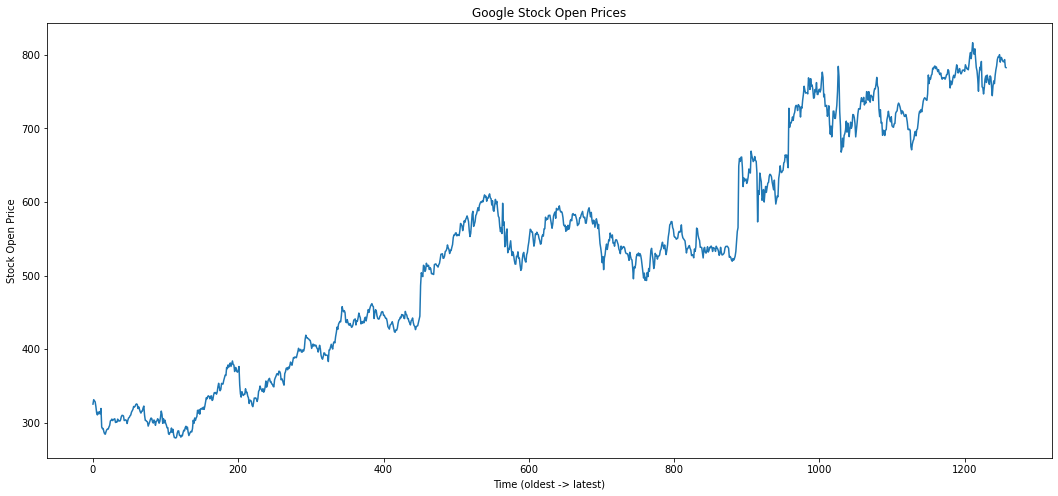

In [21]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()


In [22]:
import os
if os.path.exists('config.py'):
 print(1)
else:
 print(0)


0


In [23]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []

In [24]:
for i in range(60, len(training_set_scaled)):
 X_train.append(training_set_scaled[i-60: i, 0])
 y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape


(1198, 60)

In [25]:
y_train.shape


(1198,)

In [26]:
X_train = np.reshape(X_train, newshape =
 (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [27]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape =
(X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))
##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))
##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))
##add output layer
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 [==============================] - 11s 86ms/step - loss: 0.0376
Epoch 2/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0058
Epoch 3/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 2s 66ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0037
Epoch 13/100
38/38 [====

In [30]:
dataset_test =pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [31]:
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(20, 1)

In [32]:
dataset_total = pd.concat((dataset_train['Open'], 
dataset_test['Open']), axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) -60:].values
inputs = inputs.reshape(-1, 1)
#scale input
inputs = sc.transform(inputs)
len(inputs)


80

In [33]:
X_test = []
for i in range(60, len(inputs)):
 X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape


(20, 60, 1)

In [34]:
predicted_stock_price = regressor.predict(X_test)

1/1 [==============================] - 1s 1s/step


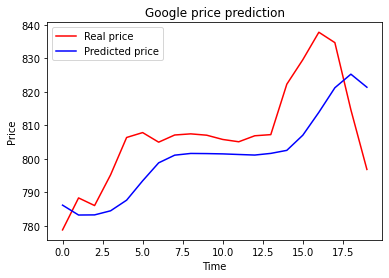

In [36]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()